In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn import preprocessing

import seaborn as sns


In [46]:
df= pd.read_csv("/content/final_unbalanced.csv", low_memory=False)

In [47]:
df.shape

(1211912, 72)

# **KNN (7/3) - Unbalanced Dataset**

In [49]:
for f in df.columns:
    if df[f].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(list(df[f].values))
        df[f] = label.transform(list(df[f].values))

In [50]:
df = df.astype(float)
df.head(20)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,690035.0,480872.0,21050.0,52201.0,4656.0,3389.0,6.0,54164.0,4544883.0,12.0,...,20.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2702781.0,193349.0,5011.0,57165.0,4604.0,53.0,17.0,55597.0,353.0,1.0,...,8.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6540559.0,625965.0,5119.0,51340.0,10969.0,443.0,6.0,47259.0,5206057.0,6.0,...,20.0,136669.0,0.00,136669.0,136669.0,5069365.0,0.0,5069365.0,5069365.0,0.0
3,138035.0,20507.0,8627.0,60389.0,3664.0,80.0,6.0,6795.0,5688954.0,2.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7653122.0,611718.0,5105.0,3389.0,6274.0,20750.0,6.0,37337.0,82717004.0,2.0,...,20.0,0.0,0.00,0.0,0.0,82717010.0,0.0,82717010.0,82717010.0,0.0
5,3015508.0,874686.0,5350.0,80.0,5653.0,41968.0,6.0,21641.0,4673406.0,4.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,5179316.0,389951.0,5311.0,58457.0,4604.0,53.0,17.0,36076.0,12715.0,1.0,...,8.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1374117.0,678966.0,21111.0,51930.0,4870.0,3389.0,6.0,41684.0,8440111.0,10.0,...,20.0,474716.0,0.00,474716.0,474716.0,5355517.0,0.0,5355517.0,5355517.0,0.0
8,18781.0,1004151.0,8625.0,51403.0,2942.0,443.0,6.0,1289.0,63680244.0,13.0,...,0.0,601874.5,788482.75,1159416.0,44333.0,30472848.0,20546240.0,45001230.0,15944464.0,0.0
9,1275490.0,873495.0,6059.0,39584.0,5055.0,80.0,6.0,21649.0,5888.0,1.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
df.isna().sum()

,0
Unnamed: 0,0
Flow ID,0
Src IP,0
Src Port,0
Dst IP,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [52]:
df.isnull().sum()

,0
Unnamed: 0,0
Flow ID,0
Src IP,0
Src Port,0
Dst IP,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [53]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211912 entries, 0 to 1211911
Data columns (total 71 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow ID            1211912 non-null  float64
 1   Src IP             1211912 non-null  float64
 2   Src Port           1211912 non-null  float64
 3   Dst IP             1211912 non-null  float64
 4   Dst Port           1211912 non-null  float64
 5   Protocol           1211912 non-null  float64
 6   Timestamp          1211912 non-null  float64
 7   Flow Duration      1211912 non-null  float64
 8   Tot Fwd Pkts       1211912 non-null  float64
 9   Tot Bwd Pkts       1211912 non-null  float64
 10  TotLen Fwd Pkts    1211912 non-null  float64
 11  TotLen Bwd Pkts    1211912 non-null  float64
 12  Fwd Pkt Len Max    1211912 non-null  float64
 13  Fwd Pkt Len Min    1211912 non-null  float64
 14  Fwd Pkt Len Mean   1211912 non-null  float64
 15  Fwd Pkt Len Std    1211912 non-n

In [55]:
y = df['Label']
X = df.drop(['Label'], axis=1, inplace=False)

print(X.shape)
print(y.shape)

(1211912, 70)
(1211912,)


In [56]:
RANDOM_STATE = 42
TEST_SIZE = 0.3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(848338, 70)
(848338,)
(363574, 70)
(363574,)


In [58]:
%%time
model=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=25,weights = 'uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CPU times: user 13min 11s, sys: 2.93 s, total: 13min 14s
Wall time: 9min 35s


In [59]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [60]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)

pr = precision_score(y_test,y_pred)
print("Precision score:", pr)

rs = recall_score(y_test,y_pred)
print("Recall score:", rs)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9988090457513463
F1-score: 0.9967157409303631
Precision score: 0.996904776354919
Recall score: 0.9965267771828978
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    297641
         1.0       1.00      1.00      1.00     65933

    accuracy                           1.00    363574
   macro avg       1.00      1.00      1.00    363574
weighted avg       1.00      1.00      1.00    363574



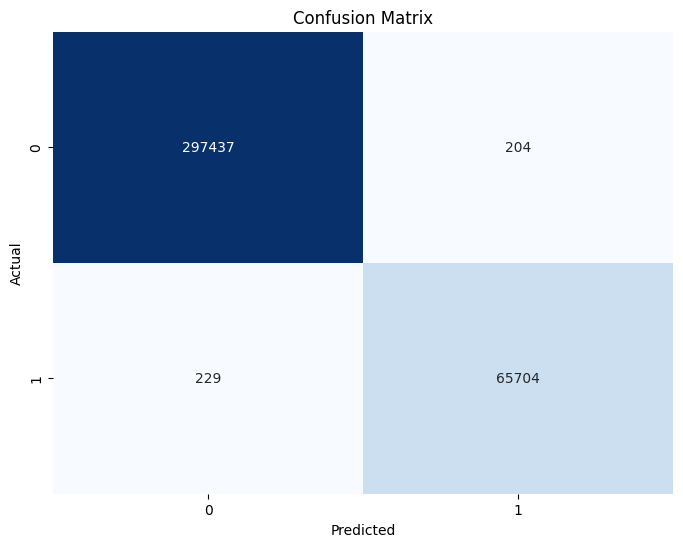

In [61]:
confusion = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

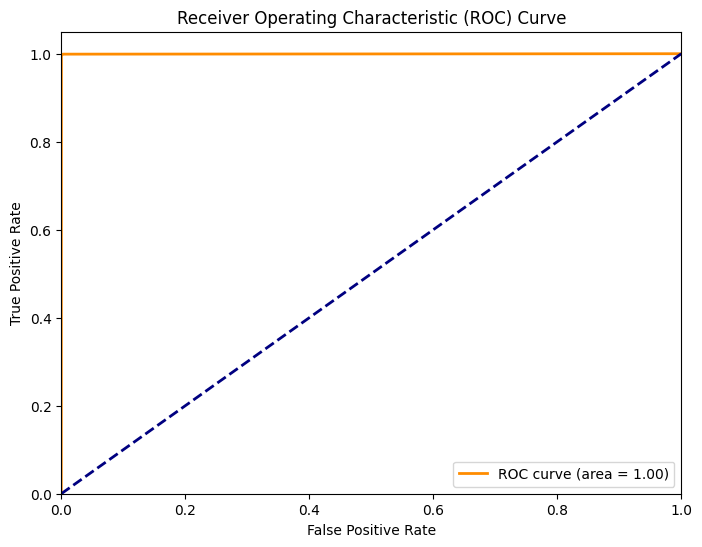

In [62]:
# prompt: Draw ROC for this KNN

from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are already defined from your KNN model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

using weight: distance

In [63]:
%%time
model_kd_distance=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=25,weights = 'distance')
model_kd_distance.fit(X_train, y_train)
y_pred_kd_distance = model_kd_distance.predict(X_test)

CPU times: user 13min 11s, sys: 3.74 s, total: 13min 15s
Wall time: 9min 29s


In [64]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)

pr = precision_score(y_test,y_pred)
print("Precision score:", pr)

rs = recall_score(y_test,y_pred)
print("Recall score:", rs)

# Evaluate the best model
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9988090457513463
F1-score: 0.9967157409303631
Precision score: 0.996904776354919
Recall score: 0.9965267771828978
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    297641
         1.0       1.00      1.00      1.00     65933

    accuracy                           1.00    363574
   macro avg       1.00      1.00      1.00    363574
weighted avg       1.00      1.00      1.00    363574



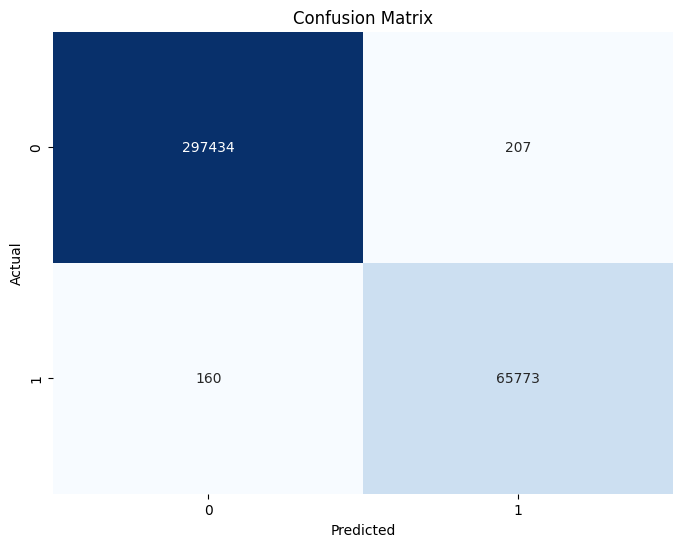

In [65]:
confusion = confusion_matrix(y_test, y_pred_kd_distance)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

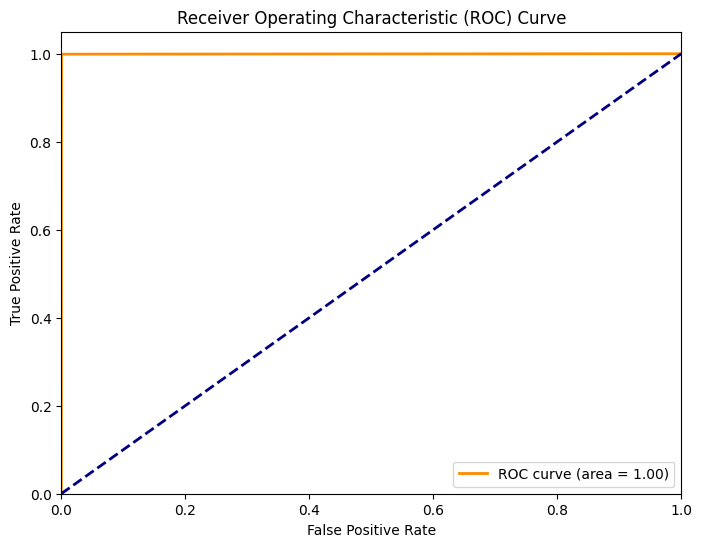

In [66]:
# prompt: Draw ROC for this KNN
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred are already defined from your KNN model
y_pred_proba = model_kd_distance.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()